In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('../data/heart_attack_prediction_dataset.csv')
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [2]:
#shape
df.shape

(8763, 26)

In [3]:
#check for data types
df.dtypes

Patient ID                          object
Age                                  int64
Sex                                 object
Cholesterol                          int64
Blood Pressure                      object
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                object
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                             object
Continent  

In [4]:
#check for missing values
df.isna().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

In [5]:
#making column titles consistent
df.columns = [column.lower().replace(" ","_") for column in df.columns]


In [6]:
#dividing blood_pressure column into two. First number is systolic pressure and second
#is diastolic pressure

df['systolic_pressure'] = df['blood_pressure'].apply(lambda x: x.split("/")[0])
df['diastolic_pressure'] = df['blood_pressure'].apply(lambda x: x.split("/")[1])
df = df.drop(columns='blood_pressure')

df

,patient_id,age,sex,cholesterol,heart_rate,diabetes,family_history,smoking,obesity,alcohol_consumption,...,bmi,triglycerides,physical_activity_days_per_week,sleep_hours_per_day,country,continent,hemisphere,heart_attack_risk,systolic_pressure,diastolic_pressure
0,BMW7812,67,Male,208,72,0,0,1,0,0,...,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0,158,88
1,CZE1114,21,Male,389,98,1,1,1,1,1,...,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0,165,93
2,BNI9906,21,Female,324,72,1,0,0,0,0,...,28.176571,587,4,4,France,Europe,Northern Hemisphere,0,174,99
3,JLN3497,84,Male,383,73,1,1,1,0,1,...,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0,163,100
4,GFO8847,66,Male,318,93,1,1,1,1,0,...,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0,91,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,61,1,1,1,0,1,...,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0,94,76
8759,QSV6764,28,Female,120,73,1,0,0,1,0,...,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0,157,102
8760,XKA5925,47,Male,250,105,0,1,1,1,1,...,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1,161,75
8761,EPE6801,36,Male,178,60,1,0,1,0,0,...,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0,119,67


In [7]:
df.drop(columns='patient_id',inplace=True)
df

,age,sex,cholesterol,heart_rate,diabetes,family_history,smoking,obesity,alcohol_consumption,exercise_hours_per_week,...,bmi,triglycerides,physical_activity_days_per_week,sleep_hours_per_day,country,continent,hemisphere,heart_attack_risk,systolic_pressure,diastolic_pressure
0,67,Male,208,72,0,0,1,0,0,4.168189,...,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0,158,88
1,21,Male,389,98,1,1,1,1,1,1.813242,...,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0,165,93
2,21,Female,324,72,1,0,0,0,0,2.078353,...,28.176571,587,4,4,France,Europe,Northern Hemisphere,0,174,99
3,84,Male,383,73,1,1,1,0,1,9.828130,...,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0,163,100
4,66,Male,318,93,1,1,1,1,0,5.804299,...,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0,91,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,Male,121,61,1,1,1,0,1,7.917342,...,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0,94,76
8759,28,Female,120,73,1,0,0,1,0,16.558426,...,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0,157,102
8760,47,Male,250,105,0,1,1,1,1,3.148438,...,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1,161,75
8761,36,Male,178,60,1,0,1,0,0,3.789950,...,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0,119,67


In [8]:
df = df.drop(columns=['continent','hemisphere'])

In [9]:
#change heart attack risk to boolean

df['heart_attack_risk'] = df['heart_attack_risk'].astype(int)
df['systolic_pressure'] = df['systolic_pressure'].astype(int)
df['diastolic_pressure'] = df['diastolic_pressure'].astype(int)
df.dtypes

age                                  int64
sex                                 object
cholesterol                          int64
heart_rate                           int64
diabetes                             int64
family_history                       int64
smoking                              int64
obesity                              int64
alcohol_consumption                  int64
exercise_hours_per_week            float64
diet                                object
previous_heart_problems              int64
medication_use                       int64
stress_level                         int64
sedentary_hours_per_day            float64
income                               int64
bmi                                float64
triglycerides                        int64
physical_activity_days_per_week      int64
sleep_hours_per_day                  int64
country                             object
heart_attack_risk                    int64
systolic_pressure                    int64
diastolic_p

### EDA

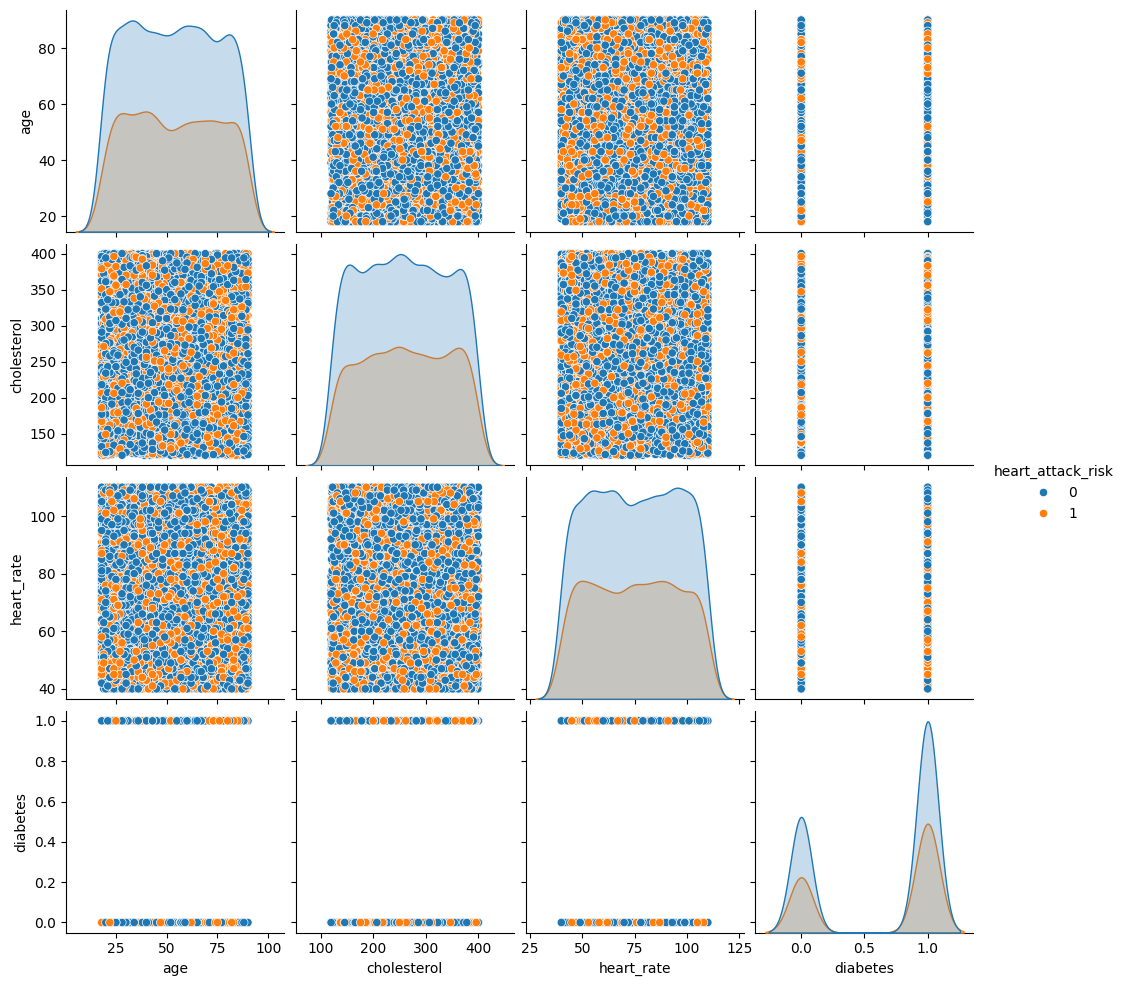

In [10]:
#QUICK EDA

subset1 = df.iloc[:, 0:5]
subset1['heart_attack_risk'] = df['heart_attack_risk']

sns.pairplot(subset1, hue='heart_attack_risk',height=2.5)
plt.show()

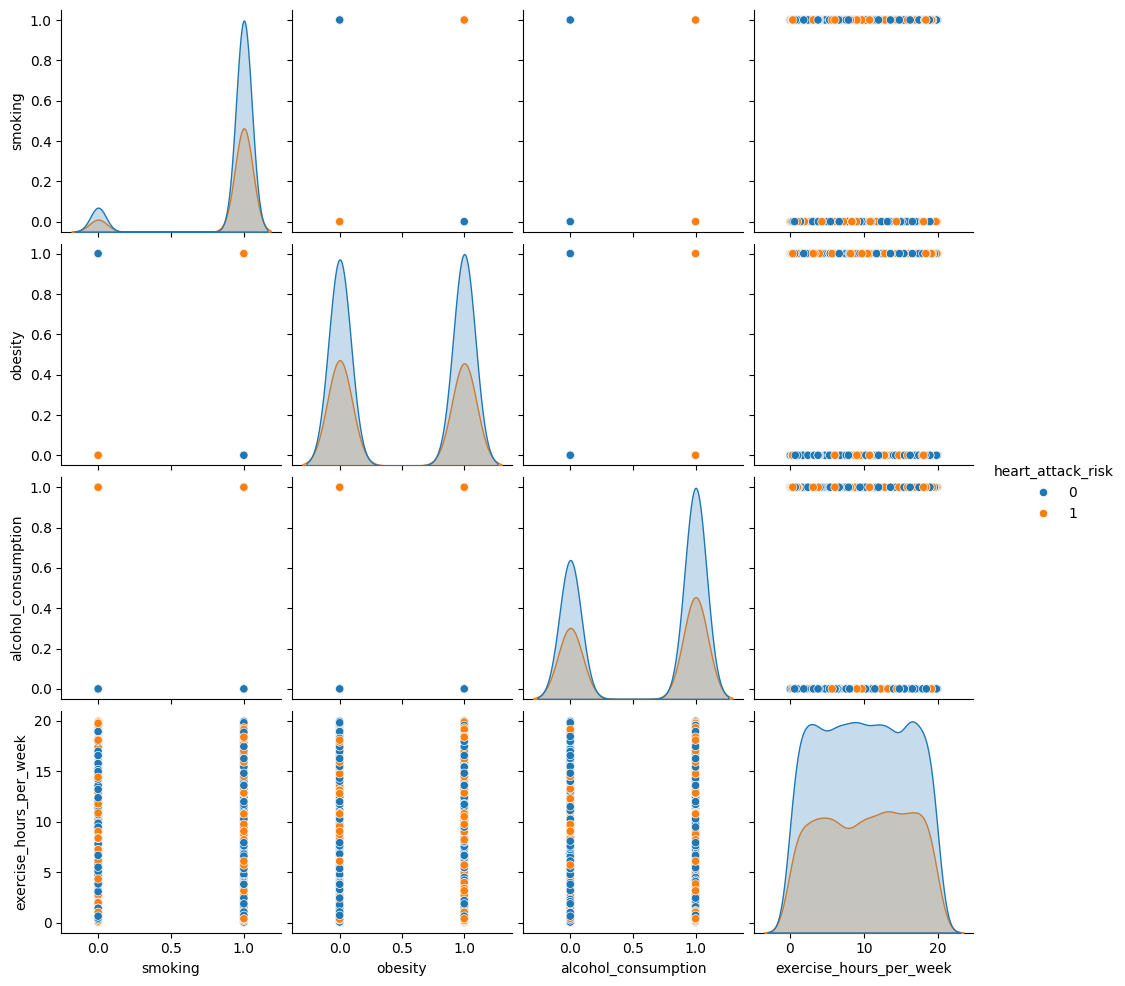

In [11]:
subset2 = df.iloc[:, 6:11]
subset2['heart_attack_risk'] = df['heart_attack_risk']

sns.pairplot(subset2, hue='heart_attack_risk',height=2.5)
plt.show()

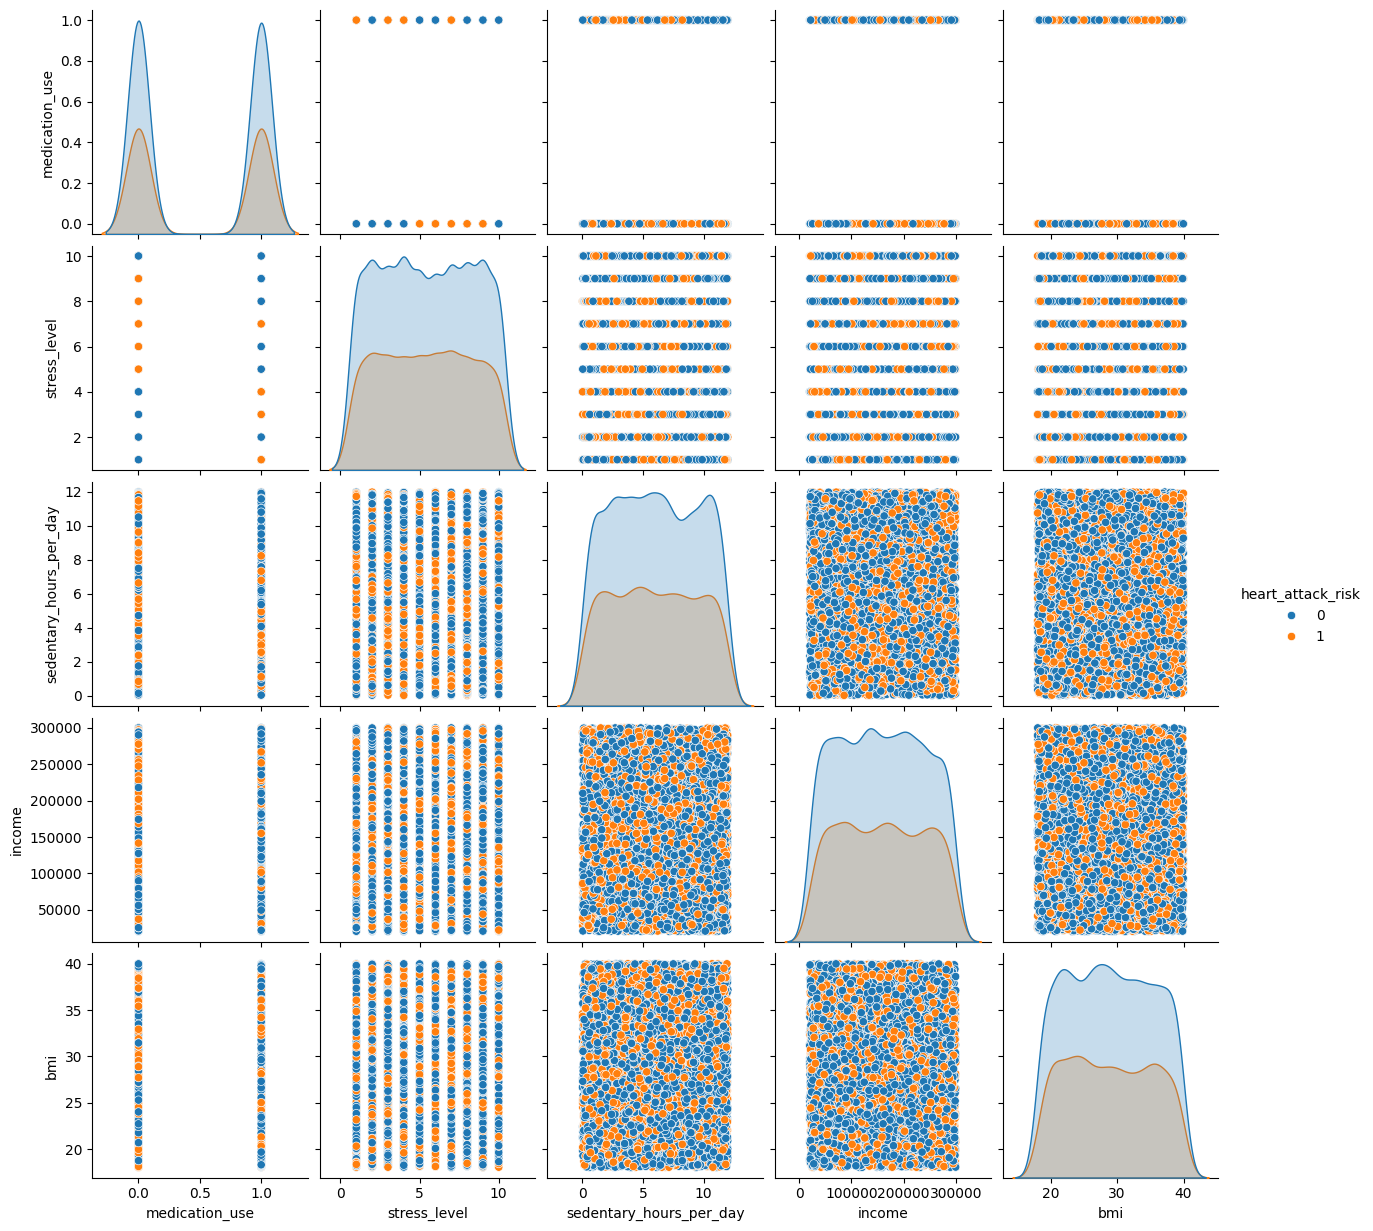

In [12]:
subset3 = df.iloc[:, 12:17]
subset3['heart_attack_risk'] = df['heart_attack_risk']

sns.pairplot(subset3, hue='heart_attack_risk',height=2.5)
plt.show()

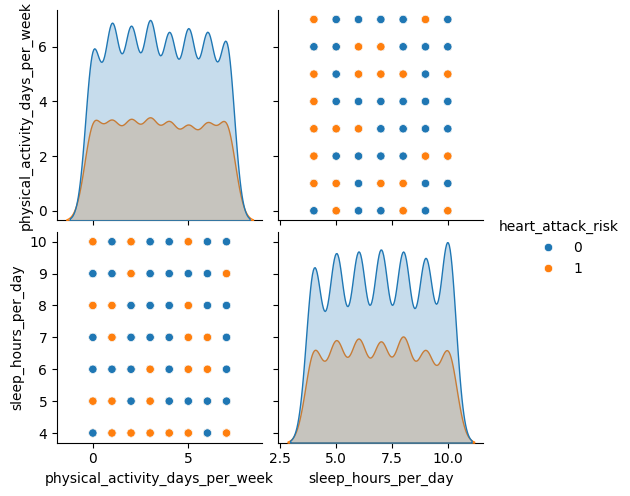

In [13]:
subset4 = df.iloc[:, 18:22]
subset4['heart_attack_risk'] = df['heart_attack_risk']

sns.pairplot(subset4, hue='heart_attack_risk',height=2.5)
plt.show()

/var/folders/t7/r8w3_tr56x11jqj9zdjr7m4w0000gn/T/ipykernel_10776/2375290846.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset5['heart_attack_risk'] = df['heart_attack_risk']


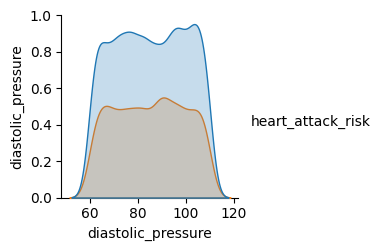

In [14]:
subset5 = df.iloc[:, 23:26]
subset5['heart_attack_risk'] = df['heart_attack_risk']

sns.pairplot(subset5, hue='heart_attack_risk',height=2.5)
plt.show()

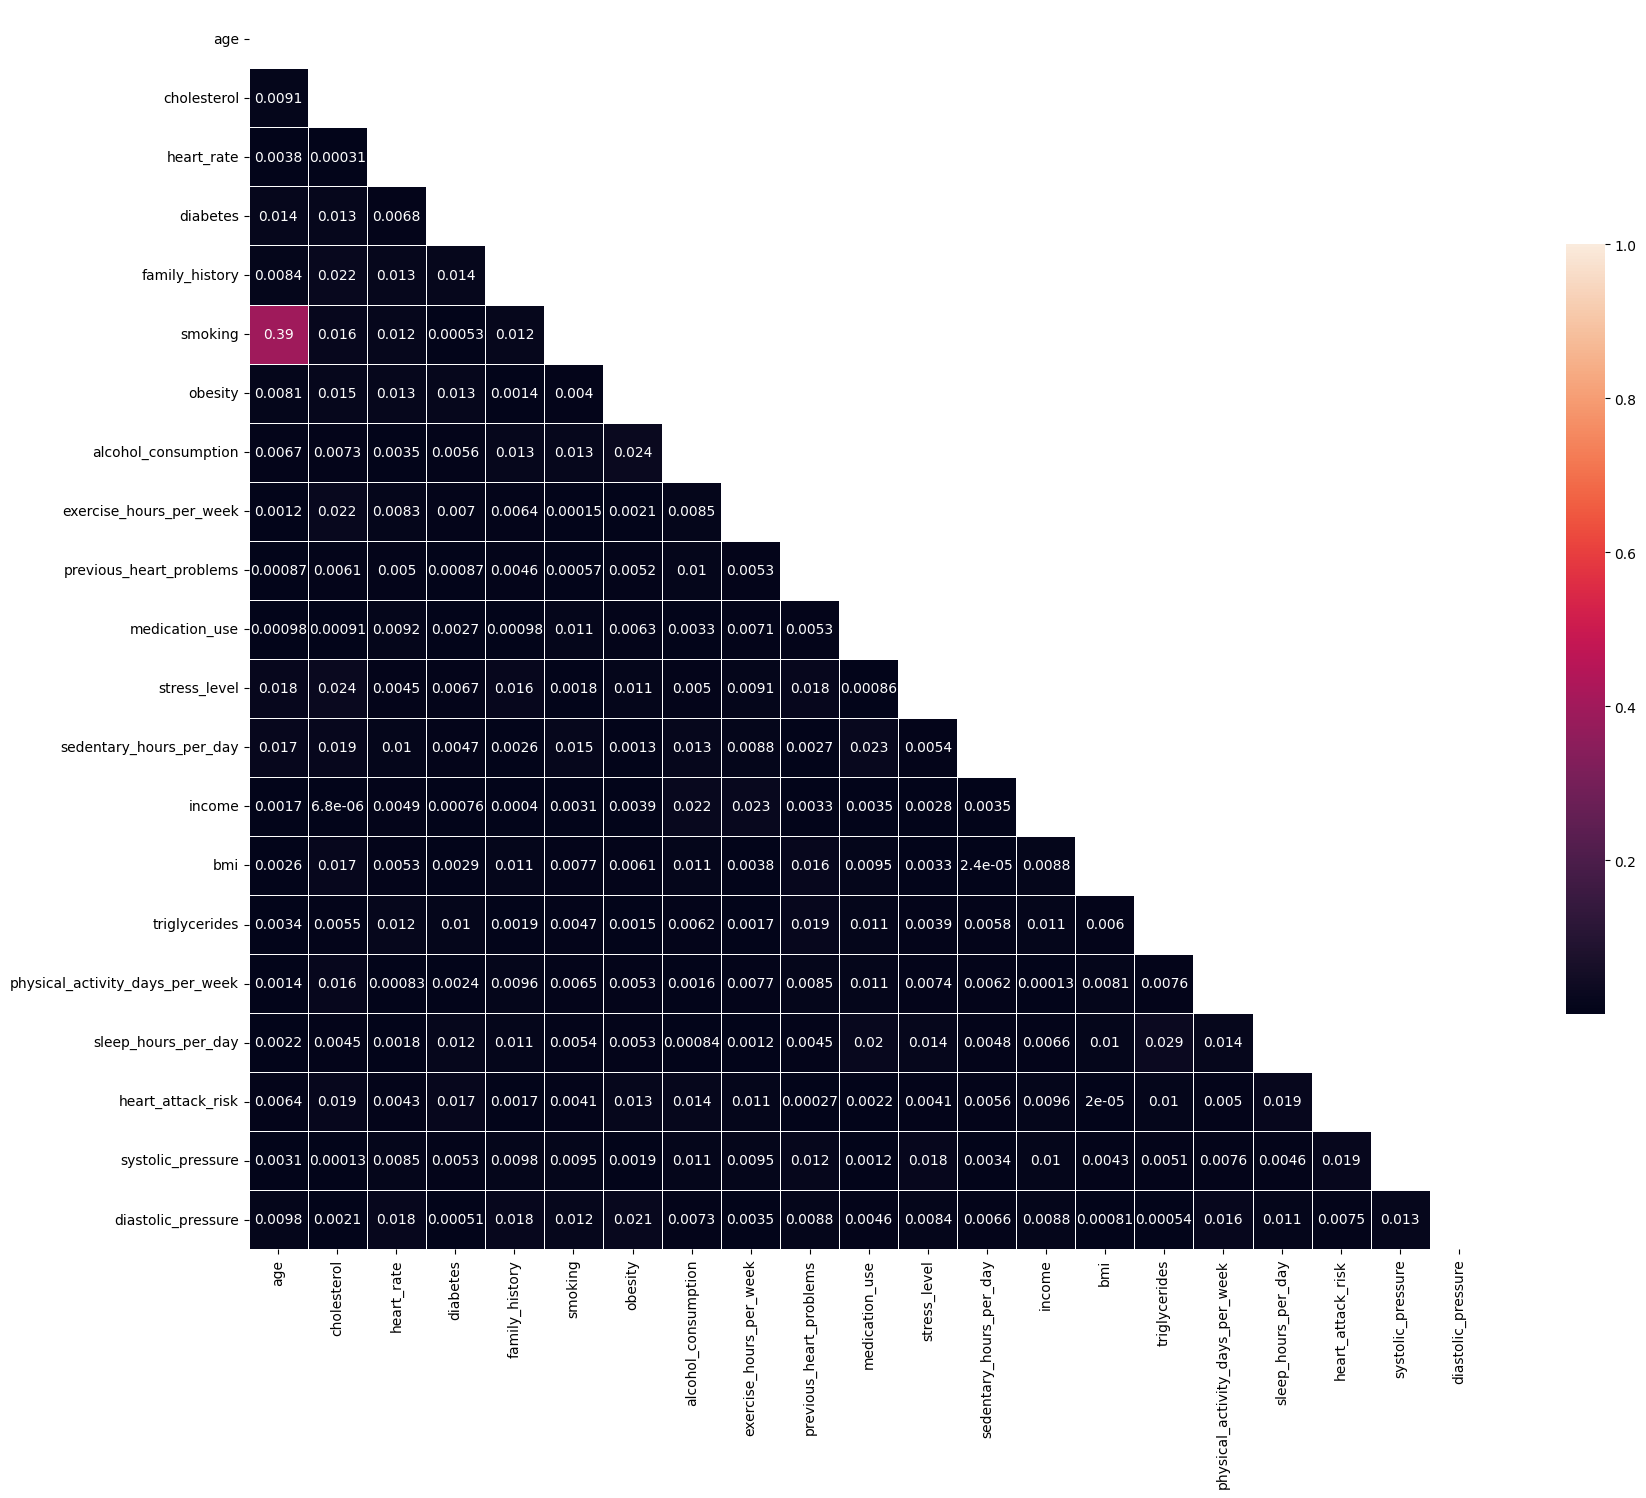

In [15]:
numerical_columns = df.select_dtypes(include='number')


corr=np.abs(numerical_columns.corr()) # corr(x,y) = corr(y, x), corr(x,x) = 1

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

### Train Test Split

In [16]:
features = df.drop(columns='heart_attack_risk')
target = df['heart_attack_risk']

In [17]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=0)

In [18]:
categorical_columns_train = X_train[['diabetes','family_history','smoking','obesity','alcohol_consumption','diet','previous_heart_problems','medication_use','sex','country']]


ohe = OneHotEncoder(sparse_output=False)
ohe.fit(categorical_columns_train)
X_train_trans_np = ohe.transform(categorical_columns_train)
X_train_trans_np

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.]], shape=(7010, 39))

In [19]:
categorical_columns_test = X_test[['diabetes','family_history','smoking','obesity','alcohol_consumption','diet','previous_heart_problems','medication_use','sex','country']]


X_test_trans_np = ohe.transform(categorical_columns_test)
X_test_trans_np

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], shape=(1753, 39))

In [20]:
#convert to dataframe

X_test_trans_df = pd.DataFrame(X_test_trans_np, columns=ohe.get_feature_names_out(), index=categorical_columns_test.index)
X_test_trans_df

,diabetes_0,diabetes_1,family_history_0,family_history_1,smoking_0,smoking_1,obesity_0,obesity_1,alcohol_consumption_0,alcohol_consumption_1,...,country_Japan,country_New Zealand,country_Nigeria,country_South Africa,country_South Korea,country_Spain,country_Thailand,country_United Kingdom,country_United States,country_Vietnam
6878,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3784,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1261,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4761,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7080,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7331,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7428,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5980,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4731,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [21]:
#convert to dataframe

X_train_trans_df = pd.DataFrame(X_train_trans_np, columns=ohe.get_feature_names_out(), index=categorical_columns_train.index)
X_train_trans_df

,diabetes_0,diabetes_1,family_history_0,family_history_1,smoking_0,smoking_1,obesity_0,obesity_1,alcohol_consumption_0,alcohol_consumption_1,...,country_Japan,country_New Zealand,country_Nigeria,country_South Africa,country_South Korea,country_Spain,country_Thailand,country_United Kingdom,country_United States,country_Vietnam
5286,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1119,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5315,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3160,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6791,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4373,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7891,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4859,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3264,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [22]:
X_train_trans_df

,diabetes_0,diabetes_1,family_history_0,family_history_1,smoking_0,smoking_1,obesity_0,obesity_1,alcohol_consumption_0,alcohol_consumption_1,...,country_Japan,country_New Zealand,country_Nigeria,country_South Africa,country_South Korea,country_Spain,country_Thailand,country_United Kingdom,country_United States,country_Vietnam
5286,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1119,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5315,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3160,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6791,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4373,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7891,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4859,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3264,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [23]:
#combine categorical columns with main dataframe

train_final = pd.concat([X_train, X_train_trans_df], axis=1)
train_final.drop(columns=categorical_columns_train.columns,inplace=True)
train_final

,age,cholesterol,heart_rate,exercise_hours_per_week,stress_level,sedentary_hours_per_day,income,bmi,triglycerides,physical_activity_days_per_week,...,country_Japan,country_New Zealand,country_Nigeria,country_South Africa,country_South Korea,country_Spain,country_Thailand,country_United Kingdom,country_United States,country_Vietnam
5286,54,262,105,13.695966,7,10.613113,63119,29.377505,41,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1119,69,293,100,4.807782,5,4.437020,110811,23.915854,723,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5315,53,297,74,13.043859,8,11.625867,106720,28.768280,202,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3160,33,346,80,7.765712,10,7.719682,30794,19.647817,138,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6791,83,386,91,18.694086,2,11.566200,251427,27.082343,747,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4373,36,228,92,2.430102,8,5.391507,110863,33.786195,453,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7891,19,266,51,11.111076,7,1.357028,201463,18.896740,246,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4859,67,254,107,2.678693,9,4.308290,71014,34.622069,48,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3264,51,399,97,10.367228,4,3.846949,20643,28.989901,580,7,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [24]:
X_test_trans_df

,diabetes_0,diabetes_1,family_history_0,family_history_1,smoking_0,smoking_1,obesity_0,obesity_1,alcohol_consumption_0,alcohol_consumption_1,...,country_Japan,country_New Zealand,country_Nigeria,country_South Africa,country_South Korea,country_Spain,country_Thailand,country_United Kingdom,country_United States,country_Vietnam
6878,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3784,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1261,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4761,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7080,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7331,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7428,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5980,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4731,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [25]:
test_final = pd.concat([X_test,X_test_trans_df], axis=1)
test_final.drop(columns=categorical_columns_test.columns,inplace=True)
test_final

,age,cholesterol,heart_rate,exercise_hours_per_week,stress_level,sedentary_hours_per_day,income,bmi,triglycerides,physical_activity_days_per_week,...,country_Japan,country_New Zealand,country_Nigeria,country_South Africa,country_South Korea,country_Spain,country_Thailand,country_United Kingdom,country_United States,country_Vietnam
6878,33,200,48,7.807690,2,0.138443,184066,30.449815,63,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3784,56,262,46,17.297628,8,0.369552,211755,34.973685,333,7,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1261,19,140,54,8.695288,3,8.646334,252203,30.554246,537,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4761,50,163,53,10.161587,7,1.107884,121954,35.390265,591,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7080,89,144,92,16.436787,1,1.337570,180121,39.575483,145,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7331,39,236,71,8.989457,5,11.734054,94044,32.033457,707,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7428,35,356,67,0.996276,4,7.304056,189363,22.804168,312,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5980,18,276,52,12.269336,3,9.984795,216178,20.512906,150,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4731,61,166,68,8.888489,5,0.766859,247143,29.863857,663,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [26]:
y_train, train_final

(5286    0
 1119    1
 5315    0
 3160    0
 6791    0
        ..
 4373    1
 7891    0
 4859    0
 3264    1
 2732    0
 Name: heart_attack_risk, Length: 7010, dtype: int64,
       age  cholesterol  heart_rate  exercise_hours_per_week  stress_level  \
 5286   54          262         105                13.695966             7   
 1119   69          293         100                 4.807782             5   
 5315   53          297          74                13.043859             8   
 3160   33          346          80                 7.765712            10   
 6791   83          386          91                18.694086             2   
 ...   ...          ...         ...                      ...           ...   
 4373   36          228          92                 2.430102             8   
 7891   19          266          51                11.111076             7   
 4859   67          254         107                 2.678693             9   
 3264   51          399          97          

In [27]:
#NUMERICAL TRANSFORMATION
from sklearn.preprocessing import MinMaxScaler


normalizer = MinMaxScaler()
normalizer.fit(X_train[["age","cholesterol","heart_rate","exercise_hours_per_week","stress_level","sedentary_hours_per_day","income","bmi","triglycerides","physical_activity_days_per_week","systolic_pressure","systolic_pressure"]])
X_train_num = normalizer.transform(X_train[["age","cholesterol","heart_rate","exercise_hours_per_week","stress_level","sedentary_hours_per_day","income","bmi","triglycerides","physical_activity_days_per_week","systolic_pressure","systolic_pressure"]])
X_test_num = normalizer.transform(X_test[["age","cholesterol","heart_rate","exercise_hours_per_week","stress_level","sedentary_hours_per_day","income","bmi","triglycerides","physical_activity_days_per_week","systolic_pressure","systolic_pressure"]])
X_train_norm = pd.DataFrame(X_train_num, columns = ["age","cholesterol","heart_rate","exercise_hours_per_week","stress_level","sedentary_hours_per_day","income","bmi","triglycerides","physical_activity_days_per_week","systolic_pressure","systolic_pressure"], index=X_train.index)
X_test_norm = pd.DataFrame(X_test_num, columns = ["age","cholesterol","heart_rate","exercise_hours_per_week","stress_level","sedentary_hours_per_day","income","bmi","triglycerides","physical_activity_days_per_week","systolic_pressure","systolic_pressure"], index=X_test.index)


train_final_norm = pd.concat([X_train_norm, X_train_trans_df], axis=1)
train_final_norm

test_final_norm = pd.concat([X_test_norm,X_test_trans_df], axis=1)
test_final_norm

,age,cholesterol,heart_rate,exercise_hours_per_week,stress_level,sedentary_hours_per_day,income,bmi,triglycerides,physical_activity_days_per_week,...,country_Japan,country_New Zealand,country_Nigeria,country_South Africa,country_South Korea,country_Spain,country_Thailand,country_United Kingdom,country_United States,country_Vietnam
6878,0.208333,0.285714,0.114286,0.390335,0.111111,0.011443,0.585955,0.565926,0.042857,0.857143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3784,0.527778,0.507143,0.085714,0.864921,0.777778,0.030722,0.684882,0.771605,0.393506,1.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1261,0.013889,0.071429,0.200000,0.434723,0.222222,0.721146,0.829395,0.570674,0.658442,0.285714,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4761,0.444444,0.153571,0.185714,0.508052,0.666667,0.092311,0.364040,0.790545,0.728571,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7080,0.986111,0.085714,0.742857,0.821871,0.000000,0.111471,0.571860,0.980826,0.149351,0.285714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7331,0.291667,0.414286,0.442857,0.449435,0.444444,0.978715,0.264323,0.637927,0.879221,0.285714,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7428,0.236111,0.842857,0.385714,0.049701,0.333333,0.609178,0.604880,0.218316,0.366234,0.714286,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5980,0.000000,0.557143,0.171429,0.613459,0.222222,0.832797,0.700685,0.114143,0.155844,0.571429,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4731,0.597222,0.164286,0.400000,0.444385,0.444444,0.063864,0.811317,0.539286,0.822078,0.285714,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(train_final, y_train)
pred = knn.predict(test_final)
pred


array([0, 1, 1, ..., 0, 0, 0], shape=(1753,))

In [29]:
print(f"The accuracy of the model is {knn.score(test_final, y_test)*100: .2f}%")

The accuracy of the model is  57.67%


In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(train_final_norm, y_train)
pred = knn.predict(test_final_norm)
pred

array([0, 1, 0, ..., 0, 1, 1], shape=(1753,))

In [31]:
print(f"The accuracy of the model is {knn.score(test_final_norm, y_test)*100: .2f}%")

The accuracy of the model is  55.85%
